<a href="https://colab.research.google.com/github/filipecarbonera/Cars_Purchase_Decision/blob/main/car_purchase_decision_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importando bibliotecas de análise, tratamento e visualização.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Importando bibliotecas para aplicação e avaliação de ML.
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score

In [ ]:
# Importando os dados.
dados = pd.read_csv('https://raw.githubusercontent.com/filipecarbonera/Cars_Purchase_Decision/main/car_data.csv')
dados.head(10)

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0
5,846,Female,47,33500,1
6,219,Female,46,132500,1
7,588,Male,42,64000,0
8,85,Female,30,84500,0
9,465,Male,41,52000,0


In [ ]:
# Visualizando tipos de dados e valores faltantes.
print(dados.info())
print(dados.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB
None
User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64


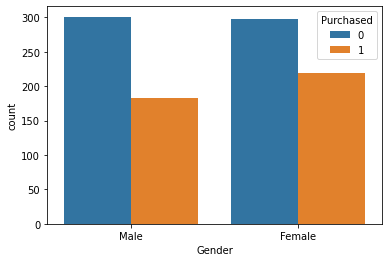

In [ ]:
# Contagem de Compras por Gênero.
sns.countplot(data=dados, x='Gender', hue='Purchased')

In [ ]:
# Verificação e criação de faixas semelhantes de Idade.
print(dados['Age'].max())
print(dados['Age'].min())
print(dados['Age'].mean())

Age_groups = pd.cut(x=dados['Age'], bins=[18,31,44,57,70])
Age_groups.value_counts()

63
18
40.106


(31, 44]    431
(44, 57]    261
(18, 31]    228
(57, 70]     75
Name: Age, dtype: int64

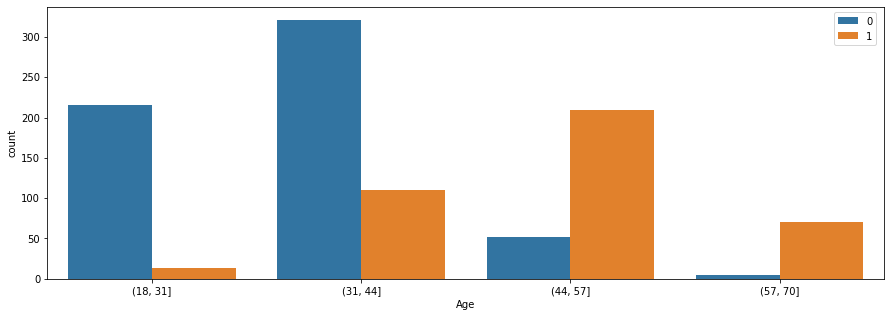

In [ ]:
# Contagem de Compras por Faixas de Idade.
plt.figure(figsize=(15,5))
sns.countplot(data=dados, x=Age_groups, hue='Purchased')
plt.legend(bbox_to_anchor=(0.94, 0.98), loc='upper left', borderaxespad=0)

In [ ]:
# Verificação e criação de faixas semelhantes de Salário Anual.
print(dados['AnnualSalary'].max())
print(dados['AnnualSalary'].min())
print(dados['AnnualSalary'].mean())

AnnualSalary_groups = pd.cut(x=dados['AnnualSalary'], bins=[15000,45000,75000, 105000, 135000, 175000])
AnnualSalary_groups.value_counts()

152500
15000
72689.0


(45000, 75000]      321
(75000, 105000]     245
(15000, 45000]      240
(105000, 135000]    116
(135000, 175000]     74
Name: AnnualSalary, dtype: int64

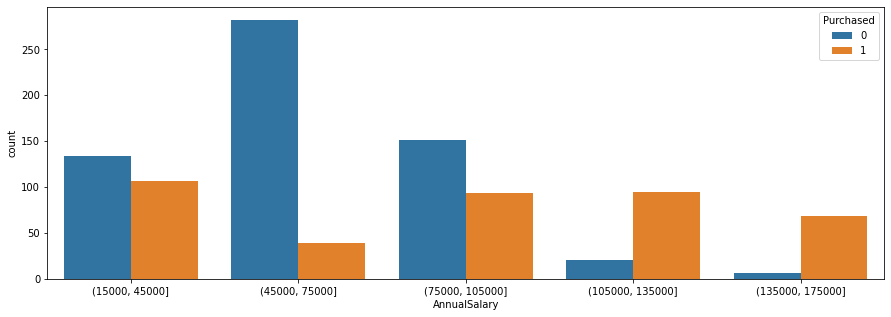

In [ ]:
# Salário Anual por Gênero.
plt.figure(figsize=(15,5))
sns.countplot(data=dados, x=AnnualSalary_groups, hue='Purchased')

In [ ]:
# Adaptação do dataframe para rodar o modelo.
dados_modelo = dados[['Gender','Age','AnnualSalary','Purchased']]
dados_modelo.head()

,Gender,Age,AnnualSalary,Purchased
0,Male,35,20000,0
1,Male,40,43500,0
2,Male,49,74000,0
3,Male,40,107500,1
4,Male,25,79000,0


In [ ]:
# Adaptação do dataframe para rodar o modelo.
dados_modelo['Gender'] = np.where(dados_modelo['Gender'] == 'Male', 1, dados_modelo['Gender'])
dados_modelo['Gender'] = np.where(dados_modelo['Gender'] == 'Female', 0, dados_modelo['Gender'])
dados_modelo['Gender'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    516
1    484
Name: Gender, dtype: int64

In [ ]:
# Adaptação do dataframe para rodar o modelo.
X = dados_modelo[['Gender','Age','AnnualSalary']]
y = dados['Purchased']

In [ ]:
# Dividindo os dados entre treino e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

# Instanciando o modelo.
modelo = DecisionTreeClassifier()

# Ajustando o modelo aos dados.
fit = modelo.fit(X_train, y_train)

# Realizando previsão com os dados de teste.
result = fit.predict(X_test)

# Visualizando a previsão.
result

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,

In [ ]:
# Avaliação da previsão.
round(roc_auc_score(y_test, result),3)

0.865